# Pipeline

In [1]:
import scipy.sparse as sps
from Builder import Builder
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample, split_train_in_two_percentage_global_sample_k_fold
from Recommenders.XGboostRecommender import XGboostRecommender
import pickle
from Evaluation.Evaluator import EvaluatorHoldout
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from tqdm import tqdm


saved_urm_path = 'saved_models'

URM = sps.load_npz(f'{saved_urm_path}/URM.npz')
URM_train = sps.load_npz(f'{saved_urm_path}/URM_train.npz')
URM_val = sps.load_npz(f'{saved_urm_path}/URM_val.npz')
URM_test = sps.load_npz(f'{saved_urm_path}/URM_test.npz')
eval = EvaluatorHoldout(URM_val, cutoff_list=[10])
etest = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 2650 (21.0%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 2136 (16.9%) Users that have less than 1 test interactions


/Users/lorecampa/anaconda3/envs/RecSysFramework/lib/python3.8/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


# Train

In [2]:
load_model_path = f'{saved_urm_path}/train'
xgboost = XGboostRecommender(URM_train, URM_val, load_model_path=load_model_path, categorical_method=None)

XGboostRecommender: URM Detected 451 ( 3.6%) users with no interactions.
XGboostRecommender: URM Detected 322 ( 1.4%) items with no interactions.


  0%|          | 0/9 [00:00<?, ?it/s]

TopPopRecommender: URM Detected 451 ( 3.6%) users with no interactions.
TopPopRecommender: URM Detected 322 ( 1.4%) items with no interactions.
TopPopRecommender: Loading model from file 'saved_models/trainTopPop'
TopPopRecommender: Loading complete
SLIMElasticNetRecommender: URM Detected 451 ( 3.6%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 322 ( 1.4%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'saved_models/trainSLIMElasticNetRecommenderCrossValNDCG'


 22%|██▏       | 2/9 [00:00<00:01,  6.01it/s]

SLIMElasticNetRecommender: Loading complete
SLIMElasticNetRecommender: URM Detected 451 ( 3.6%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 322 ( 1.4%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'saved_models/trainSLIMElasticNetRecommenderCrossValRecall40'


 56%|█████▌    | 5/9 [00:00<00:00,  6.02it/s]

SLIMElasticNetRecommender: Loading complete
RP3betaRecommender: URM Detected 451 ( 3.6%) users with no interactions.
RP3betaRecommender: URM Detected 322 ( 1.4%) items with no interactions.
RP3betaRecommender: Loading model from file 'saved_models/trainRP3betaRecommenderCrossValNDCG'
RP3betaRecommender: Loading complete
RP3betaRecommender: URM Detected 451 ( 3.6%) users with no interactions.
RP3betaRecommender: URM Detected 322 ( 1.4%) items with no interactions.
RP3betaRecommender: Loading model from file 'saved_models/trainRP3betaRecommenderCrossValRecall40'
RP3betaRecommender: Loading complete
ItemKNNCFRecommender: URM Detected 451 ( 3.6%) users with no interactions.
ItemKNNCFRecommender: URM Detected 322 ( 1.4%) items with no interactions.
ItemKNNCFRecommender: Loading model from file 'saved_models/trainItemKNNCFRecommenderCrossValNDCG'
ItemKNNCFRecommender: Loading complete
UserKNNCFRecommender: URM Detected 451 ( 3.6%) users with no interactions.
UserKNNCFRecommender: URM Detecte

 89%|████████▉ | 8/9 [00:01<00:00,  6.00it/s]

UserKNNCFRecommender: Loading complete
IALSRecommender: URM Detected 451 ( 3.6%) users with no interactions.
IALSRecommender: URM Detected 322 ( 1.4%) items with no interactions.
IALSRecommender: Loading model from file 'saved_models/trainIALSRecommender'
IALSRecommender: Loading complete
MultVAERecommender: URM Detected 451 ( 3.6%) users with no interactions.
MultVAERecommender: URM Detected 322 ( 1.4%) items with no interactions.
MultVAERecommender: Loading model from file 'saved_models/train/MultVAERecommender'
INFO:tensorflow:Restoring parameters from saved_models/train/MultVAERecommender/.session/session


2024-02-22 09:34:48.873956: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

MultVAERecommender: Loading complete
ScoresHybridRecommender: URM Detected 451 ( 3.6%) users with no interactions.
ScoresHybridRecommender: URM Detected 322 ( 1.4%) items with no interactions.
ScoresHybridRecommender: URM Detected 451 ( 3.6%) users with no interactions.
ScoresHybridRecommender: URM Detected 322 ( 1.4%) items with no interactions.


In [57]:
hs = {
    "n_estimators": 98,
    "learning_rate": 0.23756364262773189,
    "reg_alpha": 27.056293796225557,
    "reg_lambda": 0.33373808622108564,
    "max_depth": 10,
    "max_leaves": 5,
    "grow_policy": "lossguide",
    "cutoff": 20
}


In [58]:
xgboost.fit(**hs)

Generating count agreement on k feature: 100%|██████████| 3/3 [00:00<00:00, 66.88it/s]


Computing aggregate stats...


Generating item profile: 100%|██████████| 20/20 [00:00<00:00, 25.06it/s]


Time to compute features: 2.7m


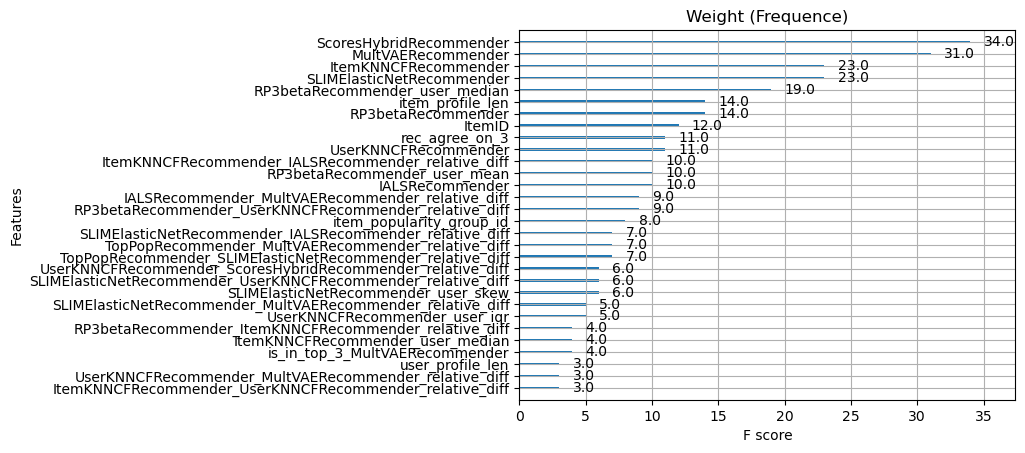

In [55]:
xgboost.plot_importance()

In [39]:
result_df, _ = etest.evaluateRecommender(xgboost)
result_df['MAP'][10]

EvaluatorHoldout: Processed 10502 (100.0%) in 6.63 sec. Users per second: 1583


0.039429390622497104

In [10]:
xgboost.prepare_to_submit(URM_train + URM_val, cutoff=35, load_model_path='saved_models/train_val')

  0%|          | 0/9 [00:00<?, ?it/s]

TopPopRecommender: URM Detected 225 ( 1.8%) users with no interactions.
TopPopRecommender: URM Detected 116 ( 0.5%) items with no interactions.
TopPopRecommender: Loading model from file 'saved_models/train_valTopPop'
TopPopRecommender: Loading complete
SLIMElasticNetRecommender: URM Detected 225 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 116 ( 0.5%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'saved_models/train_valSLIMElasticNetRecommenderCrossValNDCG'


 22%|██▏       | 2/9 [00:00<00:01,  6.45it/s]

SLIMElasticNetRecommender: Loading complete
SLIMElasticNetRecommender: URM Detected 225 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 116 ( 0.5%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'saved_models/train_valSLIMElasticNetRecommenderCrossValRecall40'


 56%|█████▌    | 5/9 [00:00<00:00,  5.80it/s]

SLIMElasticNetRecommender: Loading complete
RP3betaRecommender: URM Detected 225 ( 1.8%) users with no interactions.
RP3betaRecommender: URM Detected 116 ( 0.5%) items with no interactions.
RP3betaRecommender: Loading model from file 'saved_models/train_valRP3betaRecommenderCrossValNDCG'
RP3betaRecommender: Loading complete
RP3betaRecommender: URM Detected 225 ( 1.8%) users with no interactions.
RP3betaRecommender: URM Detected 116 ( 0.5%) items with no interactions.
RP3betaRecommender: Loading model from file 'saved_models/train_valRP3betaRecommenderCrossValRecall40'
RP3betaRecommender: Loading complete
ItemKNNCFRecommender: URM Detected 225 ( 1.8%) users with no interactions.
ItemKNNCFRecommender: URM Detected 116 ( 0.5%) items with no interactions.
ItemKNNCFRecommender: Loading model from file 'saved_models/train_valItemKNNCFRecommenderCrossValNDCG'
ItemKNNCFRecommender: Loading complete
UserKNNCFRecommender: URM Detected 225 ( 1.8%) users with no interactions.
UserKNNCFRecommender:

 78%|███████▊  | 7/9 [00:01<00:00,  5.88it/s]

UserKNNCFRecommender: Loading complete
IALSRecommender: URM Detected 225 ( 1.8%) users with no interactions.
IALSRecommender: URM Detected 116 ( 0.5%) items with no interactions.
IALSRecommender: Loading model from file 'saved_models/train_valIALSRecommender'


 89%|████████▉ | 8/9 [00:01<00:00,  5.62it/s]

IALSRecommender: Loading complete
MultVAERecommender: URM Detected 225 ( 1.8%) users with no interactions.
MultVAERecommender: URM Detected 116 ( 0.5%) items with no interactions.
MultVAERecommender: Loading model from file 'saved_models/train_val/MultVAERecommender'
INFO:tensorflow:Restoring parameters from saved_models/train_val/MultVAERecommender/.session/session


100%|██████████| 9/9 [00:03<00:00,  2.78it/s]


MultVAERecommender: Loading complete
ScoresHybridRecommender: URM Detected 225 ( 1.8%) users with no interactions.
ScoresHybridRecommender: URM Detected 116 ( 0.5%) items with no interactions.
ScoresHybridRecommender: URM Detected 225 ( 1.8%) users with no interactions.
ScoresHybridRecommender: URM Detected 116 ( 0.5%) items with no interactions.


Generating count agreement on k feature: 100%|██████████| 3/3 [00:00<00:00, 39.25it/s]


Computing aggregate stats...


Generating item profile: 100%|██████████| 20/20 [00:01<00:00, 13.75it/s]


Time to compute features: 2.7m


In [11]:
result_df, _ = etest.evaluateRecommender(xgboost)
result_df['MAP'][10]

EvaluatorHoldout: Processed 10502 (100.0%) in 6.33 sec. Users per second: 1660


0.05138474379785613

# Train Val

In [ ]:
load_model_path = f'{saved_urm_path}/train_val'
xgboost_final = XGboostRecommender(URM_train + URM_val, URM_test, load_model_path=load_model_path, categorical_method=None)

In [ ]:
xgboost_final.fit(**hs, cutoff=35)

In [ ]:
xgboost_final.plot_importance()

In [ ]:
result_df, _ = etest.evaluateRecommender(xgboost_final)
result_df['MAP'][10]

In [ ]:
xgboost_final.prepare_to_submit(URM, cutoff=35, load_model_path='saved_models/train_val_test')

In [ ]:
builder = Builder()
builder.preprocess()
df_submit = builder.prepare_sub(xgboost_final)
builder.create_sub(df_submit, file_name='xgboost_final')

# Other test

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

df = xgboost.features.copy()
categorical_columns = ['UserID', 'ItemID']
print(f'SVD encoding categorical columns: {categorical_columns}...')

X_seq = df[categorical_columns].apply(lambda x: " ".join(list([str(y) + str(i) for i, y in enumerate(x)])), axis=1)

latent_dims = 100
svd_feats = ['svd_'+str(l) for l in range(latent_dims)]
vectorizer = TfidfVectorizer()

dim_reduction = TruncatedSVD(n_components=latent_dims, random_state=42)        
df[svd_feats] =  dim_reduction.fit_transform(vectorizer.fit_transform(X_seq))   

cumulative_explained_variance = dim_reduction.explained_variance_ratio_.cumsum()
explained_variance = cumulative_explained_variance[-1]

print(f'Variance explained by {latent_dims} latent dimensions: {explained_variance:.2%}')    

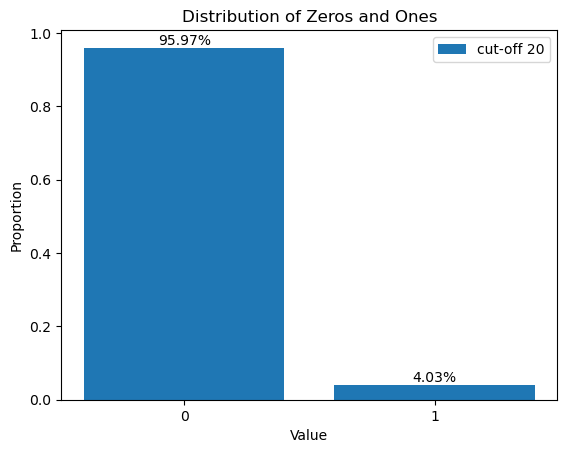

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = xgboost.features[['ItemID', 'UserID', 'Label']].copy()
cutoff = int(hs['cutoff'])


# Create a DataFrame

# Calculate the distribution
value_counts = df['Label'].value_counts()
distribution = value_counts / len(df)

# Calculate percentage of ones
percentage_of_ones = distribution[1] * 100

# Plot the distribution
plt.bar(value_counts.index, distribution.values, label=f'cut-off {cutoff}')
plt.xticks([0, 1])
plt.xlabel('Value')
plt.ylabel('Proportion')
plt.title('Distribution of Zeros and Ones')

# Annotate the bars with the percentages
for i, percentage in enumerate(distribution):
    plt.text(i, distribution.values[i], f'{percentage:.2%}', ha='center', va='bottom', color='black', fontsize=10)

plt.legend()
plt.show()